In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
import os

In [2]:
#Read data
data = pd.read_csv("Enterococcus_faecalis_Infection_Data.csv")
data = data.iloc[1:]
data.dropna(inplace=True)

In [3]:
data["SevenDay_Death"] = data["SevenDay_Death"].astype(int)
data["ThirtyDay_Death"] = data["ThirtyDay_Death"].astype(int)
data["SixWeek_Death"] = data["SixWeek_Death"].astype(int)
data["ThreeMo_Death"] = data["ThreeMo_Death"].astype(int)
data["SixMo_Death"] = data["SixMo_Death"].astype(int)
data["NineMo_Death"] = data["NineMo_Death"].astype(int)
data["OneYear_Death"] = data["OneYear_Death"].astype(int)

In [4]:
data.replace(to_replace ="00-10", value = "5", inplace = True)
data.replace(to_replace ="11-20", value = "15.5", inplace = True)
data.replace(to_replace ="21-30", value = "25.5", inplace = True)
data.replace(to_replace ="31-40", value = "35.5", inplace = True)
data.replace(to_replace ="41-50", value = "45.5", inplace = True)
data.replace(to_replace ="51-60", value = "55.5", inplace = True)
data.replace(to_replace ="61-70", value = "65.5", inplace = True)
data.replace(to_replace ="71-80", value = "75.5", inplace = True)
data.replace(to_replace ="81-90", value = "85.5", inplace = True)
data.replace(to_replace ="80+", value = "80", inplace = True)

del data['Unnamed: 0']

data

,AGE_GRP,SevenDay_Death,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2064,Protein 2065,Protein 2066,Protein 2067,Protein 2068,Protein 2069,Protein 2070,Protein 2071,Protein 2072,Protein 2073
1,55.5,0,0,0,0,0,0,0,1.0,0.110355,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,0,1,1,1,1,1,1,5.0,-0.036816,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,75.5,1,1,1,1,1,1,1,2.0,-0.162532,...,2.071827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,80,0,0,0,0,0,0,0,2.0,-0.097824,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,55.5,0,0,0,0,1,1,1,2.0,-0.159146,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322,80,0,1,1,1,1,1,1,3.0,0.236907,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1323,80,0,0,0,0,1,1,1,1.0,-0.086171,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,75.5,0,0,0,0,0,0,0,0.0,-0.167347,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,65.5,0,0,0,0,0,0,0,2.0,0.076349,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

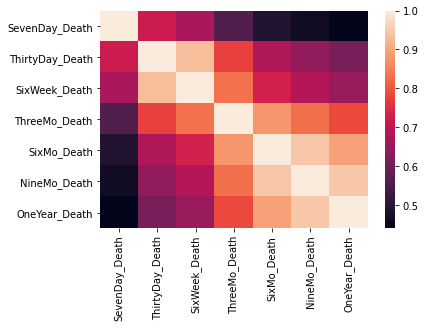

In [5]:
#Correlation Matrix
subdata = data.iloc[:, [0,1,2,3,4,5,6,7]]
sns.heatmap(subdata.corr(), annot=False)

In [6]:
### the heatmap shows high correlation between all mortality rates, expected but should drop all to predict one

In [7]:
#Choose feature
X = data.drop(["SevenDay_Death", "ThirtyDay_Death", "SixWeek_Death", "ThreeMo_Death", "SixMo_Death", "NineMo_Death", "OneYear_Death"], axis=1)
#Choose target
Y = data['OneYear_Death']

In [8]:
# Normalize
from sklearn import preprocessing
X=preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=False)

In [9]:
#Split training/testing data
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)


In [10]:
#Naive Bayes
gnb = GaussianNB()

In [11]:
Y_pred = gnb.fit(X_train, Y_train).predict(X_test)

In [12]:
# training score
gnb.score(X_train, Y_train)*100

66.9383003492433

In [13]:
# testing score
gnb.score(X_test, Y_test)*100

48.78048780487805

In [14]:
Y_train_pred = gnb.predict(X_train)
Y_test_pred = gnb.predict(X_test)

In [15]:
#Calculate accuracy scores
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

#Calculate F1 scores
train_f1_score = f1_score(Y_train, Y_train_pred)
test_f1_score = f1_score(Y_test, Y_test_pred)

print(f"Training Accuracy for Naive Bayes Model: {train_accuracy:.4f}")
print(f"Testing Accuracy for Naive Bayes Model: {test_accuracy:.4f}")
print(f"Training F1 Score: {train_f1_score:.4f}")
print(f"Testing F1 Score: {test_f1_score:.4f}")

Training Accuracy for Naive Bayes Model: 0.6694
Testing Accuracy for Naive Bayes Model: 0.4878
Training F1 Score: 0.6494
Testing F1 Score: 0.4000


<AxesSubplot:>

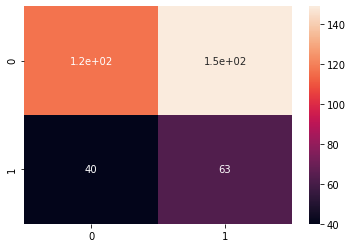

In [16]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, Y_test_pred)

accuracy_score(Y_test, Y_test_pred)

sns.heatmap(cm, annot=True)

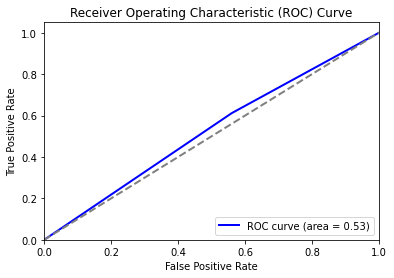

In [17]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_test_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()